# Predicting Atomic Polarizability Using Machine Learning

 The formula for atomic polarizability is $\alpha = \dfrac{p}{E}$ where p is the dipole moment and E is the electric field.  
 P has units of Couloub * Distance = Cm
 E is measured in units of Netwons per coulomb = N/C  
 Based on the above, the formula for polarizability in proper units is $\alpha = \dfrac{Cm}{\dfrac{N}{C}}=\dfrac{C^2m}{N}$=$C^2mN−1$

## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Molecules.csv')

df.head()

,row ID,Molecule,Molecule name,Mannhold LogP,Atomic Polarizabilities,Aromatic Atoms Count,Aromatic Bonds Count,Element Count,Bond Polarizabilities,Bond Count,...,XLogP,Zagreb Index,Molecular Formula,Formal Charge,Formal Charge (pos),Formal Charge (neg),Heavy Atoms Count,Molar Mass,SP3 Character,Rotatable Bonds Count (non terminal)
0,Row0,N,H3N,1.35,3.100379,0,0,4,1.299621,0,...,0.000,0,H3N,0,0,0,1,17.0305254685134,0.000000,0
1,Row1,O=C(O)c1c(OC(=O)C)cccc1,C9H8O4,2.01,24.382344,6,6,21,12.577656,13,...,1.422,60,C9H8O4,0,0,0,13,180.157768811976,0.047619,3
2,Row2,C#C,C2H2,1.68,4.853586,0,0,4,2.186414,1,...,0.418,2,C2H2,0,0,0,2,26.0373533012276,0.000000,0
3,Row3,P(=O)(OP(=O)(OC[C@H]1O[C@@H](n2c3ncnc(c3nc2)N)...,C10H16N5O13P3,0.25,55.084688,9,10,47,55.749312,33,...,-5.533,170,C10H16N5O13P3,0,0,0,31,507.181476012675,0.106383,8
4,Row4,S1C([C@H](C(=O)O)N2[C@H]1[C@H](NC(=O)[C@H](N)c...,C16H19N3O4S,2.34,50.237067,6,6,43,27.904933,26,...,-1.732,132,C16H19N3O4S,0,0,0,24,349.406462995722,0.162791,4


Non-numerical columns:
Molecule, name, formula

In [2]:
df = df[df.apply(lambda row: not any(row == '#NUM!'), axis=1)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13600 entries, 0 to 15165
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   row ID                                  13600 non-null  object 
 1   Molecule                                13600 non-null  object 
 2   Molecule name                           13600 non-null  object 
 3   Mannhold LogP                           13600 non-null  float64
 4   Atomic Polarizabilities                 13600 non-null  object 
 5   Aromatic Atoms Count                    13600 non-null  int64  
 6   Aromatic Bonds Count                    13600 non-null  int64  
 7   Element Count                           13600 non-null  int64  
 8   Bond Polarizabilities                   13600 non-null  object 
 9   Bond Count                              13600 non-null  int64  
 10  Eccentric Connectivity Index            13600 non-null  int64  

In [3]:
# setting Atomic Polarizabilites as the target column
target = df['Atomic Polarizabilities']
del df['Atomic Polarizabilities']
target.head()

0     3.100379
1    24.382344
2     4.853586
3    55.084688
4    50.237067
Name: Atomic Polarizabilities, dtype: object

In [19]:
#Create a copy of the original data for manipulation
working_data = df[:]

# One hot encode the SMILE format for molecules to a sparse matrix that model can handle
This was a way to work with the molecule column by featurizing the given format but was not used in the end.  
import deepchem as dc  
featurizer = dc.feat.SmilesToImage(img_size = 80, img_spec = 'std')  
features = featurizer.featurize(working_data['Molecule'])  
#working_data['Molecule'] = features  
print(features)


In [5]:
working_data.head()
working_data.tail()

,row ID,Molecule,Molecule name,Mannhold LogP,Aromatic Atoms Count,Aromatic Bonds Count,Element Count,Bond Polarizabilities,Bond Count,Eccentric Connectivity Index,...,XLogP,Zagreb Index,Molecular Formula,Formal Charge,Formal Charge (pos),Formal Charge (neg),Heavy Atoms Count,Molar Mass,SP3 Character,Rotatable Bonds Count (non terminal)
15161,Row15162,O=C1C=C2C=C[C@H]3[C@H]4[C@]([C@@](OC(=O)C)(C(=...,C22H28O4,3.44,0,0,54,35.399796,29,510,...,3.245,150,C22H28O4,0,0,0,26,356.456150546736,0.277778,3
15162,Row15163,S1(=O)(=O)OC(c2c(cc(O)cc2)C)(c3c(cc(O)cc3)C)c4...,C21H18O5S,3.11,18,18,45,28.069726,30,439,...,3.876,154,C21H18O5S,0,0,0,27,382.431497032297,0.066667,2
15163,Row15164,S(=O)(=O)(O)CC(O)CN1CCOCC1,C7H15NO5S,1.46,0,0,29,26.770105,14,176,...,-2.121,66,C7H15NO5S,0,0,0,14,225.264075422824,0.241379,4
15164,Row15165,[AsH4+],H4As,1.35,0,0,5,14.572828,0,0,...,0.000,0,AsH4,1,1,0,1,78.9533595153032,0.000000,0
15165,Row15166,P(=O)(OCC1OC(n2c3ncnc(c3nc2)NC(=O)NCC)C4C1OC(/...,C22H25N6O8P,2.23,15,16,62,51.650175,41,1078,...,0.010,200,C22H25N6O8P,0,0,0,37,532.443928867752,0.129032,8


In [20]:
#Removing columns with nonnumerical data
del working_data['row ID']
del working_data['Molecule name']
smiles = df['Molecule']
del working_data['Molecule']
del working_data['Molecular Formula']
#perfectly correlated with bond count so removing
del working_data['Zagreb Index']
#Molar mass and molecular weight are the same thing so one was removed
del working_data['Molar Mass']

In [7]:
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#pca = PCA(n_components=20)
#principle_components = pca.fit_transform(working_data)
#
#
#principal_df = pd.DataFrame(data=principle_components, columns=[f'PC{i}' for i in range(1, 20 + 1)])
#principal_df.head()

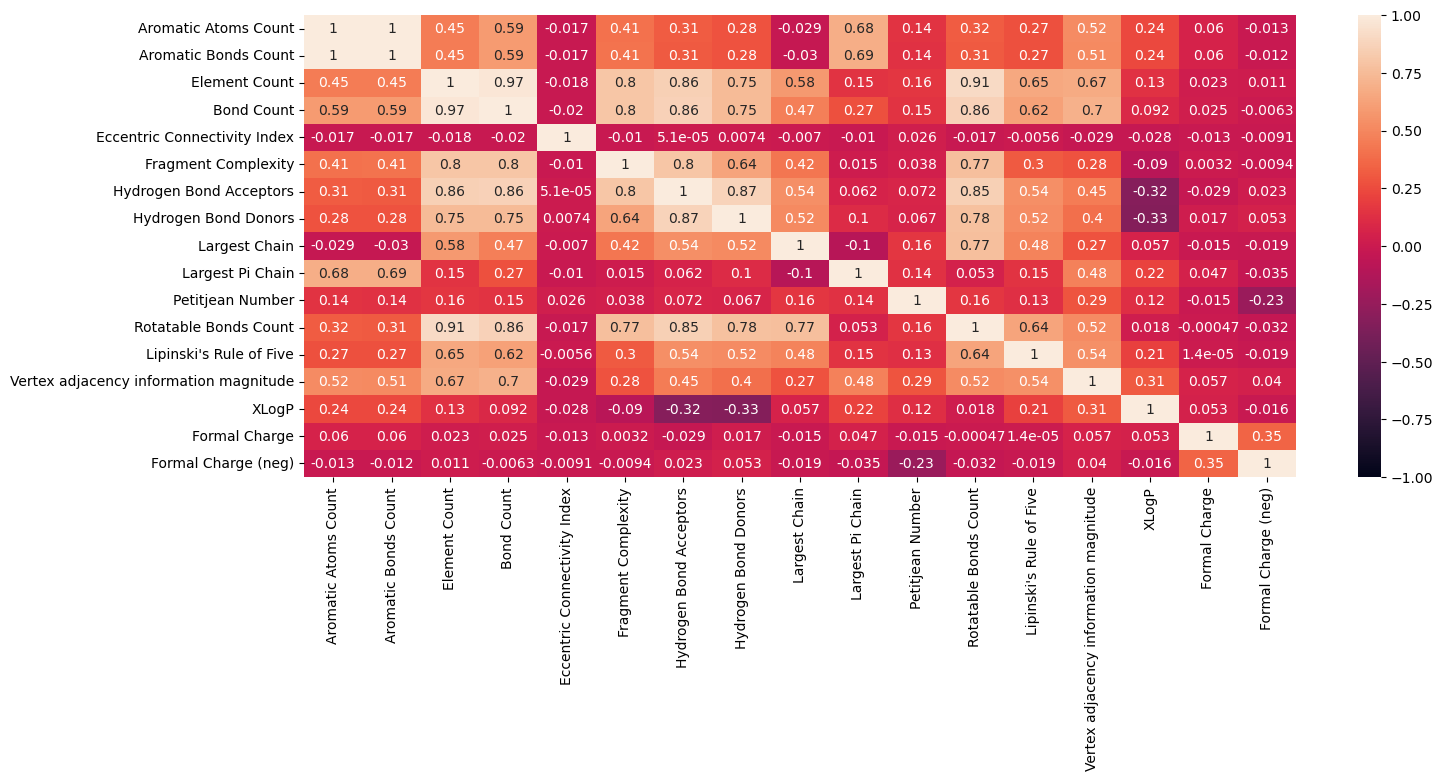

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(working_data[['Aromatic Atoms Count', 'Aromatic Bonds Count', 'Element Count',
       'Bond Count', 'Eccentric Connectivity Index','Fragment Complexity', 
       'Hydrogen Bond Acceptors', 'Hydrogen Bond Donors', 'Largest Chain',
       'Largest Pi Chain', 'Petitjean Number', 'Rotatable Bonds Count', 'Lipinski\'s Rule of Five', 'Vertex adjacency information magnitude', 'XLogP',
       'Formal Charge','Formal Charge (neg)']].corr(), vmin = -1, vmax = 1, annot=True)

working_data = working_data[['Aromatic Atoms Count', 'Aromatic Bonds Count', 'Element Count',
       'Bond Count', 'Eccentric Connectivity Index','Fragment Complexity', 
       'Hydrogen Bond Acceptors', 'Hydrogen Bond Donors', 'Largest Chain',
       'Largest Pi Chain', 'Petitjean Number', 'Rotatable Bonds Count', 'Lipinski\'s Rule of Five', 'Vertex adjacency information magnitude', 'XLogP',
       'Formal Charge','Formal Charge (neg)']]

**Normalizing all the data made a slight improvement on the MSE score and was better than standardization**

In [ ]:

from sklearn.preprocessing import MinMaxScaler  

normalizer = MinMaxScaler()  
columns_to_normalize = ['Molecular Weight','Fragment Complexity', 'Topological Polar Surface Area', 'SP3 Character']  
working_data = normalizer.fit_transform(working_data[:])  

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(working_data, target, test_size=0.4, random_state=42)


## KNN Regression Model
Chose this model as it can predict continuous variables, the model failed to train because it couldn't split an object of Nonetype

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train,y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

## Linear Regression model

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lreg = LinearRegression()

lreg.fit(X_train,y_train)
# Predicting the Test set results
y_pred= lreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
#print(accuracy_score(y_test, y_pred, normalize=False))

Mean Squared Error: 0.56


In [11]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=20, warm_start=False)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)


177.76070251748035


**Model wouldn't train**  
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Stacked Model
The linear regression model showed the highest accuracy. A stacked model was tested to improve the accuracy. Improvements were minimal.

In [24]:
#Stacking multiple regression models
#doesn't improve much
from sklearn.ensemble import StackingRegressor

models = [
    ('lr1', LinearRegression()),
    ('lr2', LinearRegression()),
    ('lr3', LinearRegression()),
]

ensemble = StackingRegressor(
    estimators=models,
    final_estimator=LinearRegression()
)

ensemble.fit(X_train, y_train)
ensemble_predictions = ensemble.predict(X_test)

mse = mean_squared_error(y_test, ensemble_predictions)
print('means squared error: ',mse)


means squared error:  0.566882591724201


In [45]:
test_run = ensemble.predict([X_test[12]])
print("Predicted value: ", test_run)
print("Actual value ", y_test.iloc[12])

test_run2 = ensemble.predict([X_test[2000]])
print("\nPredicted value: ", test_run2)
print("Actual value ", y_test.iloc[2000])

test_run3 = ensemble.predict([X_test[245]])
print("\nPredicted value: ", test_run3)
print("Actual value ", y_test.iloc[245])

Predicted value:  [37.32723811]
Actual value  37.545895

Predicted value:  [13.6929467]
Actual value  13.185586

Predicted value:  [41.07309421]
Actual value  41.349102


## Testing Convoluted Neural Network
**altering hyperparameters to improve mse**

In [31]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(20, 50), max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 3.123273919927164


In [33]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(20, 80), max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.877753724626494


In [34]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.7270322491801884


In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=2000, random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.7270322491801884


Adjusting the layer size had the biggest effect on accuracy and was able to cut the mse in half. With more adjustment it might be able to match linear regression for accuracy.

In [46]:
test_run = mlp.predict([X_test[12]])
print("Predicted value: ", test_run)
print("Actual value ", y_test.iloc[12])

test_run2 = mlp.predict([X_test[2000]])
print("\nPredicted value: ", test_run2)
print("Actual value ", y_test.iloc[2000])

test_run3 = mlp.predict([X_test[245]])
print("\nPredicted value: ", test_run3)
print("Actual value ", y_test.iloc[245])

Predicted value:  [36.43059197]
Actual value  37.545895

Predicted value:  [14.55019957]
Actual value  13.185586

Predicted value:  [41.62260589]
Actual value  41.349102
